# Dataset: [Crime In Baltimore](https://www.kaggle.com/datasets/sohier/crime-in-baltimore)

## About Dataset
This dataset provides information about the crimes commited in Baltimore city. This dataset is accessible from the link provided above. The dataset covers crimes commited in the city between the years 2016-2020.

This project consists of _ parts:
1. Introduction
2. Data Cleaning
3. Data visualization
4. Data Preprocessing
. . .
5. Conclusion

# 1. Introduction

This data consists of total 15 columns and 2,76,529 observations.

## Attribute description:
* **CrimeDate:** Date of committed crime
* **CrimeTime:** Time of Committed crime
* **CrimeCode:** A unique code assigned to crime based of crime type and weapon used
* **Location:** Location of commited crime
* **Inside/Outside:** Flag shows whether crime was commited inside the house or not
* **Weapon:** Description of weapon used in crime
* **Post:**
* **District:** District of location of committed crime
* **Neighbourhood:**
* **Longitude:** longitude of location of committed crime
* **Latitude:** latitude of location of committed crime
* **Location 1:** tuple of consisting longitude and latitude
* **Primise:**
* **Total incidents:**


## **Let's look at the dataset**

In [1]:
# import required libraries
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Krupesh's Work

In [4]:
df = pd.read_csv("drive/My Drive/Data Mining/Project/Assignment - 01/BPD_Part_1_Victim_Based_Crime_Data.csv")
df.head()

FileNotFoundError: ignored

In [ ]:
df.shape

(276529, 15)

In [ ]:
columns = df.columns
columns = columns.tolist()
columns

['CrimeDate',
 'CrimeTime',
 'CrimeCode',
 'Location',
 'Description',
 'Inside/Outside',
 'Weapon',
 'Post',
 'District',
 'Neighborhood',
 'Longitude',
 'Latitude',
 'Location 1',
 'Premise',
 'Total Incidents']

In [ ]:
df.isna().sum()

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             2207
Description             0
Inside/Outside      10279
Weapon             180952
Post                  224
District               80
Neighborhood         2740
Longitude            2204
Latitude             2204
Location 1           2204
Premise             10757
Total Incidents         0
dtype: int64

# 2. Data Cleaning

As it is visible that, there are 1,80,952 cells are null in the weapons column. Which is around 65% rows of the whole data.
Dropping this rows can lead to loss of much significant data, which can reduce the quality of the dataset.

To deal with this null values, we can look at some other attributes, which can be related to this attribute. Like, Crime type can help to determine which type of weapon is used in a perticular crime.

In [ ]:
# Find the list of crime types in which there are null entries in the weapon column
crime_with_no_weapon = set()
for idx in df.index:
    if pd.isnull(df['Weapon'][idx]):
        crime_with_no_weapon.add(df['Description'][idx])
crime_with_no_weapon

{'ARSON',
 'ASSAULT BY THREAT',
 'AUTO THEFT',
 'BURGLARY',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET'}

As it visible that where weapon values are null, the associated crime types are mostly robbery, theft, arson, larceny, etc. In these types of crime most of the time there are not any weapon involved in crime.

So, the blank cells in weapon cells doesn't indicate that the data is missing, but we can conclude that there could no weapons involved in the crime at the first place.

So, we can fill all this blank cells with the "No weapon" value, .....

In [ ]:
# fill blank cells in weapon column with "No weapon" value
df['Weapon'].fillna("NO WEAPON", inplace = True)

In [ ]:
df['Total Incidents'].value_counts()

1    276529
Name: Total Incidents, dtype: int64

In the 'Total Incident' columns all the entries are filled with value 1. Which does not provide any value to the dataset. So, there is no loss in dataset quality in dropping this columns.

After this, the 'Location 1' columns contains the tuple of (Longitude, Latitude) as values. There are also separate columns for Longitude and Latitude as well. So, dropping the Location 1 column also does not affect the dataset quality.

In [ ]:
# dropping Total Incident, Longitude, and Latitude columns
df.drop(['Total Incidents', 'Location 1'], axis=1, inplace=True)
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,ROW/TOWNHO
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NO WEAPON,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,STREET
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,Street
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,ROW/TOWNHO
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,STREET


In [ ]:
df['Inside/Outside'].value_counts()

I          131999
O          129782
Outside      3837
Inside        632
Name: Inside/Outside, dtype: int64

Here, I suggest for Inside and O suggest for outside. There are also few entries in which Outside is written insted of O, and Inside is written insted of I. So, we should change those values with O and I respectively to maintain ....

In [ ]:
df.loc[df['Inside/Outside'] == "Outside", 'Inside/Outside'] = 'O'
df.loc[df['Inside/Outside'] == "Inside", 'Inside/Outside'] = 'I'
df['Inside/Outside'].value_counts()

O    133619
I    132631
Name: Inside/Outside, dtype: int64

In [ ]:
# After all this, if there are still some entries with null or none values drop them
df.isna().sum()

CrimeDate             0
CrimeTime             0
CrimeCode             0
Location           2207
Description           0
Inside/Outside    10279
Weapon                0
Post                224
District             80
Neighborhood       2740
Longitude          2204
Latitude           2204
Premise           10757
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.isna().sum(), df.shape

(CrimeDate         0
 CrimeTime         0
 CrimeCode         0
 Location          0
 Description       0
 Inside/Outside    0
 Weapon            0
 Post              0
 District          0
 Neighborhood      0
 Longitude         0
 Latitude          0
 Premise           0
 dtype: int64,
 (263118, 13))

In [ ]:
df.isnull().sum()

CrimeDate         0
CrimeTime         0
CrimeCode         0
Location          0
Description       0
Inside/Outside    0
Weapon            0
Post              0
District          0
Neighborhood      0
Longitude         0
Latitude          0
Premise           0
dtype: int64

We would now save our cleaned data frame into cleaned.csv file

In [ ]:
df.to_csv("cleaned.csv")

Vrishin's Work

In [5]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/data/cleaned_crime_in_baltimore.csv")
df.head()

,Unnamed: 0,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise
0,0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,ROW/TOWNHO
1,1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NO WEAPON,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,STREET
2,2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,O,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,Street
3,3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,ROW/TOWNHO
4,4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,STREET


In [6]:
df.columns

Index(['Unnamed: 0', 'CrimeDate', 'CrimeTime', 'CrimeCode', 'Location',
       'Description', 'Inside/Outside', 'Weapon', 'Post', 'District',
       'Neighborhood', 'Longitude', 'Latitude', 'Premise'],
      dtype='object')

In [7]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0   CrimeDate CrimeTime CrimeCode               Location  \
0                0  09/02/2017  23:30:00       3JK        4200 AUDREY AVE   
1                1  09/02/2017  23:00:00        7A      800 NEWINGTON AVE   
2                2  09/02/2017  22:53:00        9S          600 RADNOR AV   
3                3  09/02/2017  22:50:00        4C         1800 RAMSAY ST   
4                4  09/02/2017  22:31:00        4E           100 LIGHT ST   
...            ...         ...       ...       ...                    ...   
263113      276524  01/01/2012  00:00:00        6J           1400 JOH AVE   
263114      276525  01/01/2012  00:00:00        6J       5500 SINCLAIR LN   
263115      276526  01/01/2012  00:00:00        6E  400 N PATTERSON PK AV   
263116      276527  01/01/2012  00:00:00        5A        5800 LILLYAN AV   
263117      276528  01/01/2012  00:00:00        5A      1900 GRINNALDS AV   

                Description Inside/Outsid

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Longitude', ylabel='Latitude'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


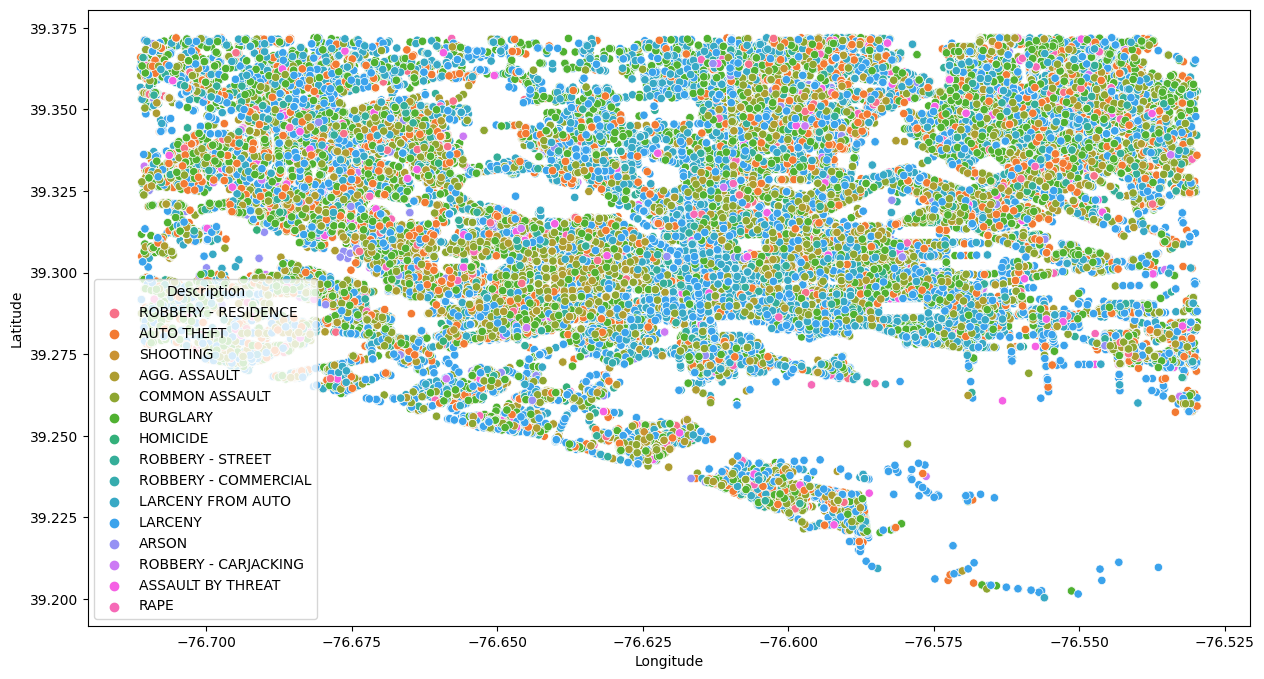

In [9]:
plt.figure(figsize=(15,8))
sns.scatterplot(y=df['Latitude'], x = df['Longitude'], hue = df['Description'])

<Axes: ylabel='Inside/Outside'>

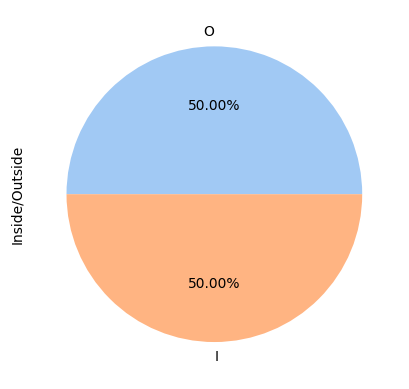

In [43]:
crimeLoc = df['Inside/Outside'].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(crimeLoc)]
crimeLoc.plot(kind = 'pie', colors=piec_colors, autopct='%1.2f%%')

<Axes: ylabel='Description'>

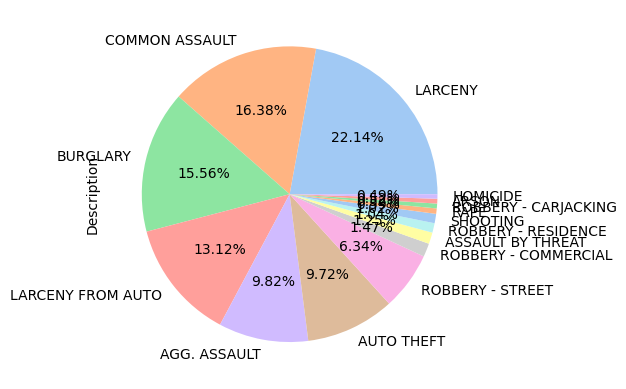

In [10]:
crimeDescription = df.Description.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(crimeDescription)]
crimeDescription.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')
#add <1% in others

<Axes: ylabel='Weapon'>

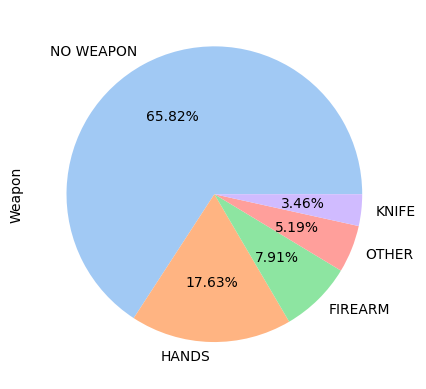

In [11]:
weaponUsed = df.Weapon.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(weaponUsed)]
weaponUsed.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

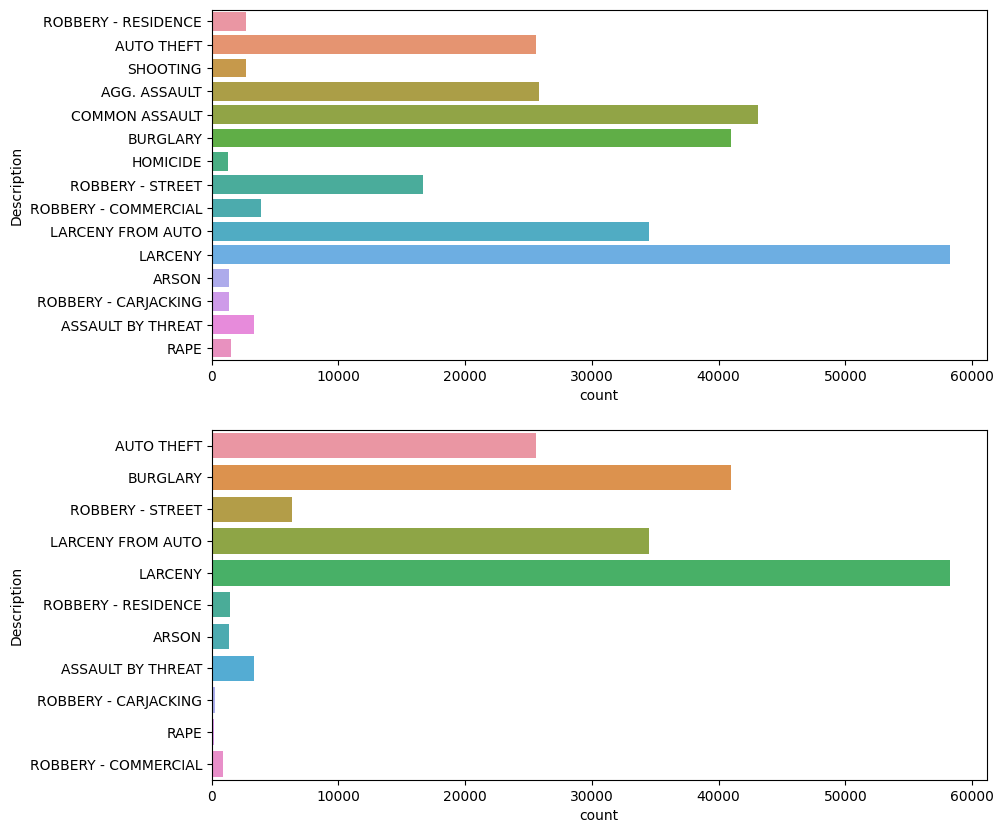

In [14]:
#Show this to prove that null values = no weapons used
fig, ax = plt.subplots(2,1)
sns.countplot(y = df['Description'], ax = ax[0])
dfNull = df[df['Weapon']=="NO WEAPON"]
sns.countplot(y= dfNull['Description'], ax = ax[1])
fig.set_size_inches(10,10)
fig.show()

In [31]:
df['CrimeTime'] = df['CrimeTime'].str.replace('24:00:00', '00:00:00')

In [32]:
df['Date'] = df['CrimeDate'] + ' ' + df['CrimeTime']
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday + 1
df['Hour'] = df['Date'].dt.hour

In [34]:
df = df.drop(['CrimeDate', 'CrimeTime'], axis = 1)

In [35]:
df = df.set_index('Date')

[]

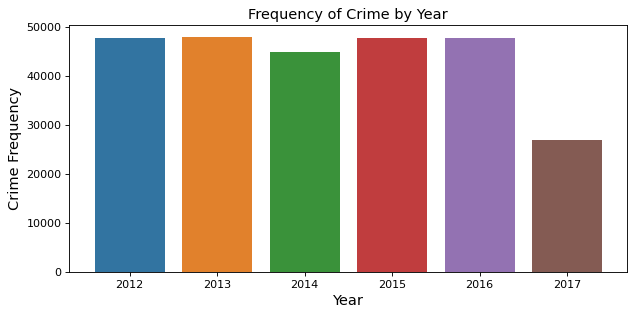

In [38]:
plt.figure(figsize=(9,4), dpi=80)

plt.title('Frequency of Crime by Year', fontsize=13)
ax = sns.countplot(x = 'Year', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.plot()

[]

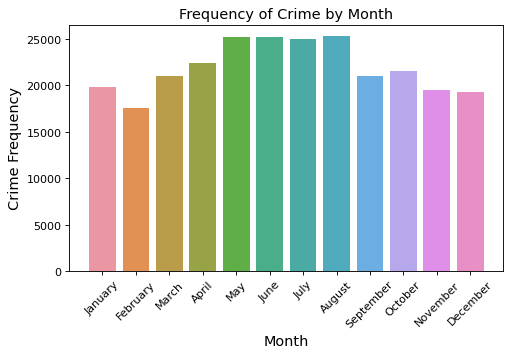

In [36]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Month', fontsize=13)
ax = sns.countplot(x = 'Month', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.xticks(rotation = 45)
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(labels)
plt.plot()

[]

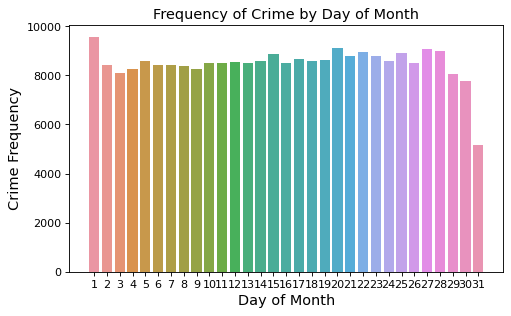

In [37]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Day of Month', fontsize=13)
ax = sns.countplot(x = 'Day', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Month', fontsize=13)
plt.plot()

[]

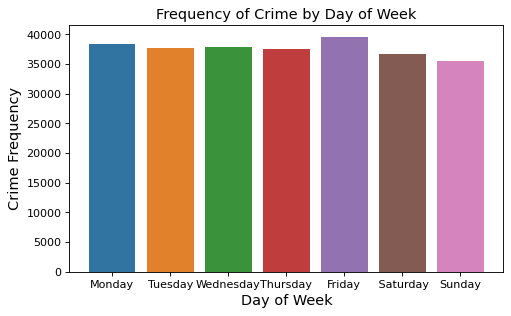

In [40]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=13)
ax = sns.countplot(x = 'Weekday', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Week', fontsize=13)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

[]

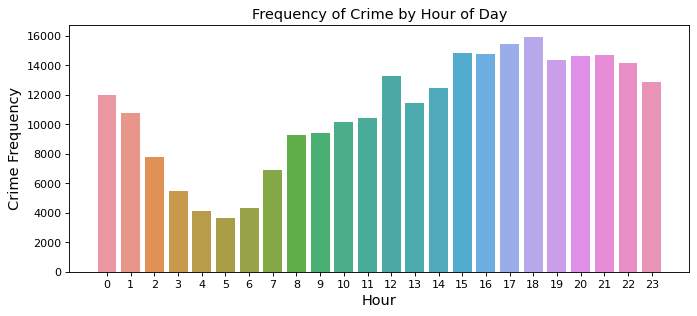

In [41]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by Hour of Day', fontsize=13)
ax = sns.countplot(x = 'Hour', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Hour', fontsize=13)
plt.plot()

In [26]:
import folium
from folium.plugins import HeatMap

In [ ]:
help(folium)

In [19]:
df['Latitude'].median()

39.30368

In [20]:
df['Longitude'].median()

-76.61401

In [44]:
def createMap(defaultLocation = [39.30368, -76.61401], defaultZoomStart = 12):
    defMap = folium.Map(location = defaultLocation, control_scale = True, tiles="Stamen Toner", zoom_start = defaultZoomStart)
    return defMap

In [45]:
map = createMap()

In [28]:
df['count'] = 1

In [29]:
df_murder = df[df['Description'] == 'HOMICIDE']

In [51]:
HeatMap(
        data = df_murder[['Latitude', 'Longitude', 'count']].groupby(
            ['Latitude', 'Longitude']).sum().reset_index().values.tolist(),
        radius = 8,
        max_zoom = 13).add_to(map)
map